In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import os
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl  
config = {
    "font.family":'sans-serif',
    "font.size": 12,
    "mathtext.fontset":'stix',
    "font.serif": ['MS Arial'],
}
rcParams.update(config)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


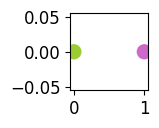

In [2]:
# 配色
def generate_colors(num_colors):
    cmap_list = [plt.cm.tab20, plt.cm.tab20b, plt.cm.tab20c, plt.cm.tab10, plt.cm.Paired, plt.cm.Set3]
    colors = np.vstack([cmap(np.linspace(0, 1, cmap.N))[:, :3] for cmap in cmap_list])
    if len(colors) < num_colors:
        additional_colors = np.random.rand(num_colors - len(colors), 3)
        colors = np.vstack([colors, additional_colors])
    return colors[:num_colors]

new_colors = generate_colors(200)

# colors_2 = ['#0095B7', '#E76A6A']
colors_2 = ['#9ACD32', '#CD69C9']
# colors_2 = ['#3172B9', '#C04292']

plt.figure(figsize=(1,1))
plt.scatter([0,1], [0,0], c=colors_2, s=100)
plt.show()

In [3]:
# dataset = "Xenium_Prime_Ovarian_Cancer_FFPE"
dataset = "XeniumLungCancer"
ad = sc.read_h5ad("E:/SZ/Results/" + dataset + "/" + dataset + "_GWT_anndata.h5ad")

if dataset == 'XeniumLungCancer':
    ad.obs['leiden_Raw_res1_origin'] = ad.obs['leiden_Raw_res1'].copy()
    print(np.unique(ad.obs['leiden_Raw_res1']))
    new_cluster_names = [
        "AT2_CYP2B6", # 0 
        "Basal Epithelial", #  1 Basal Epithelial
        "T",# 2 MS4A4A, MS4A6A
        "AT2_SFTA2",# 3 GPRC5A, EPCAM, MALL, GPX2, TMC5, EHF, MET, MDM2, MET
        "CAF", #4 CFB, CFTR, FXYD2
        "Macrophage",#5,分不清是ductal还是Exocrine_glandular_cells
        "Secretory Epithelial",#6, CD163混杂了上皮
        "Endothelial",#7 
        "Plasma",#8 Endothelial, VWF, PECAM1, CD34, CD93, PDGFRB
        "Smooth Muscle",#9, CD34, CD93
        "Mast",#10, CHGA, GCG	, INS
        "Ciliated"
    ]
    ad.rename_categories("leiden_Raw_res1", new_cluster_names)
    print(np.unique(ad.obs['leiden_Raw_res1']))
    
ad

['C0' 'C1' 'C10' 'C11' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9']
['AT2_CYP2B6' 'AT2_SFTA2' 'Basal Epithelial' 'CAF' 'Ciliated'
 'Endothelial' 'Macrophage' 'Mast' 'Plasma' 'Secretory Epithelial'
 'Smooth Muscle' 'T']


AnnData object with n_obs × n_vars = 149195 × 377
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'z_level', 'nucleus_count', 'cell_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'Kmeans_Raw', 'leiden_Raw_res0.4', 'leiden_Raw_res0.6', 'leiden_Raw_res0.8', 'leiden_Raw_res1', 'leiden_Raw_res1.2', 'Kmeans_scale0.01', 'leiden_scale0.01_res0.4', 'leiden_scale0.01_res0.6', 'leiden_scale0.01_res0.8', 'leiden_scale0.01_res1', 'leiden_scale0.01_res1.2', 'Kmeans_scale1.0', 'leiden_scale1.0_res0.4', 'leiden_scale1.0_res0.6', 'leiden_scale1.0_res0.8', 'leiden_scale1.0_res1', 'leiden_scale1.0_res1.2', 'Kmeans_scale2.5', 'leiden_scale2.5_res0.4', 'leiden_scale2.5_res0.6', 'leiden_s

In [4]:
selected_cluster = 'Macrophage'
scale = 4.5
n_component = 2

save_path = "C:/Projects/spatialzoomer/figs_plot/" + dataset + "/" + selected_cluster
# create path
if not os.path.exists(save_path):
    os.makedirs(save_path)

## 数据整体情况

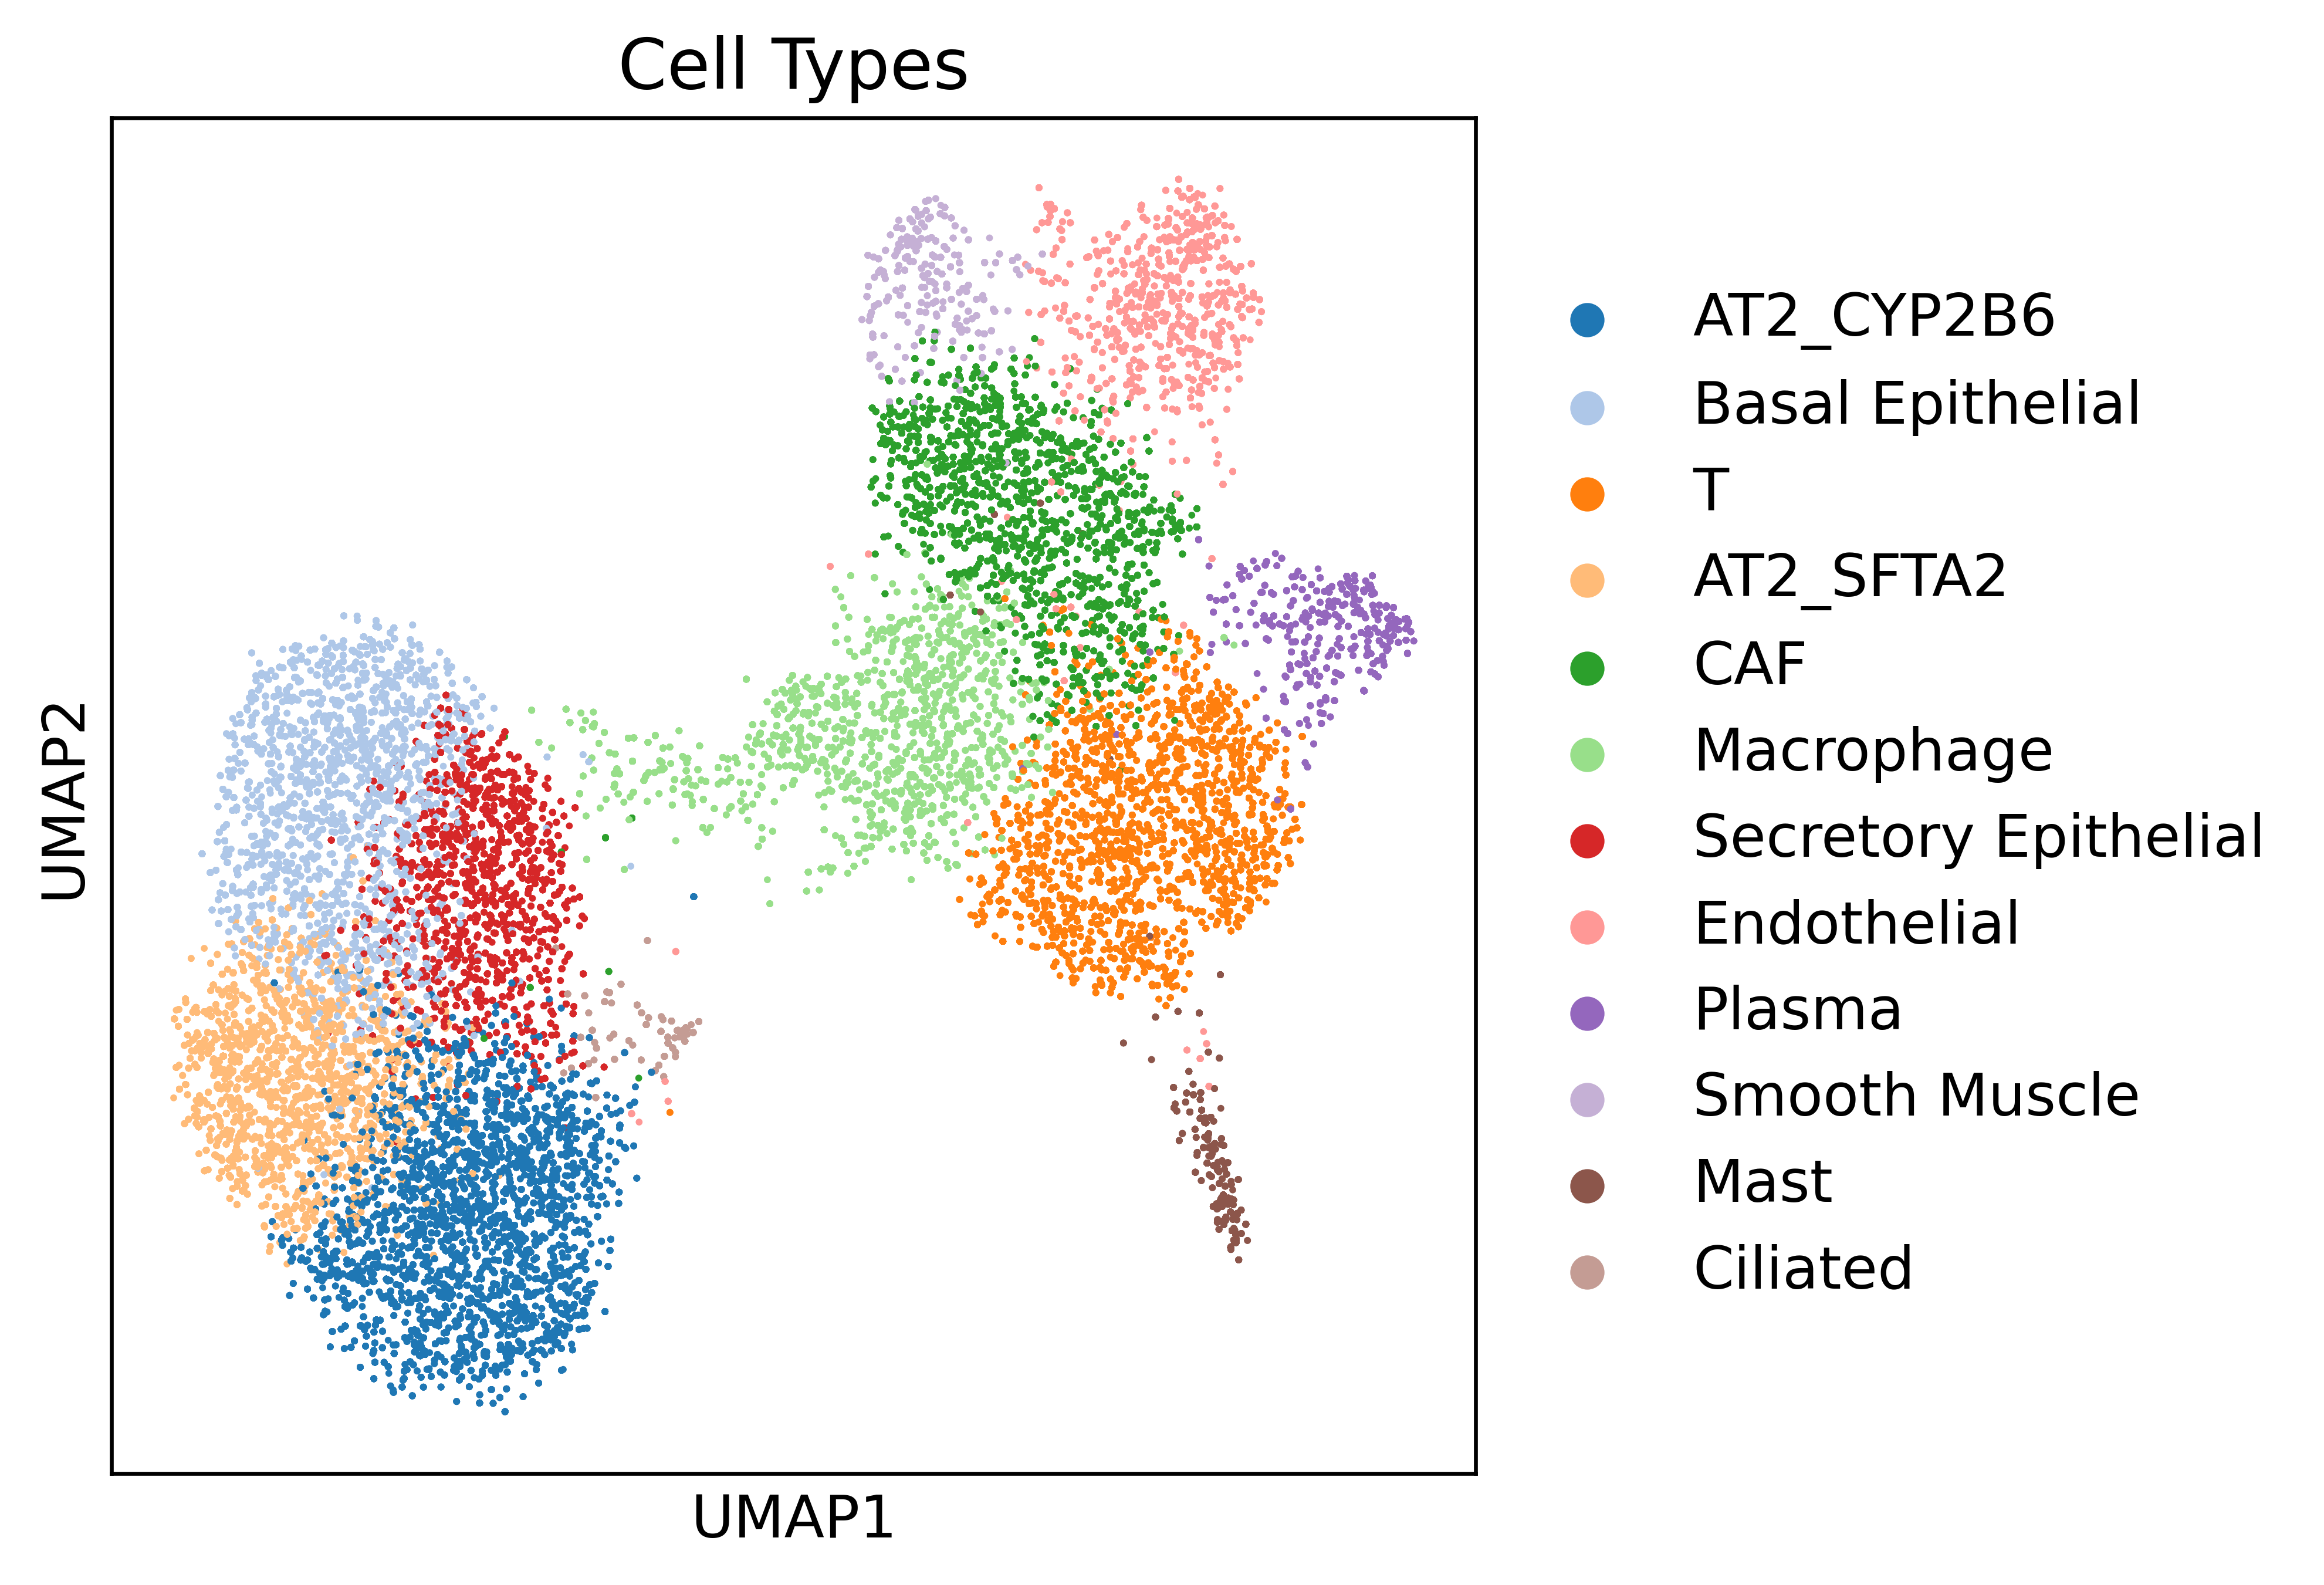

In [7]:
# ad.obsm['X_umap'] = ad.obsm['X_umap_Raw']
# sc.pl.umap(ad, color='leiden_Raw_res1')

# 绘图参考
leiden_col = 'leiden_Raw_res1'
# leiden_col = 'Cell_Type_refine'

cell_type_counts = ad.obs[leiden_col].value_counts()

# 根据细胞数量对类别进行排序
sorted_cell_types = cell_type_counts.index.tolist()

# 创建一个颜色映射字典，将每个类别映射到对应的颜色
color_mapping = {cell_type: new_colors[i] for i, cell_type in enumerate(sorted_cell_types)}

# 创建一个按照排序后的类别顺序的颜色列表
sorted_colors = [color_mapping[cell_type] for cell_type in ad.obs[leiden_col].cat.categories]

ad.uns[leiden_col + '_colors'] = sorted_colors
ad.obsm['X_umap'] = ad.obsm['X_umap_Raw']

fig, ax = plt.subplots(figsize=(5, 5), dpi=600)
sc.pl.umap(ad, 
           color=leiden_col, 
           size=8, 
           ax=ax, 
           show=False, 
           title='Cell Types')
for collection in ax.collections:
    collection.set_rasterized(True)  # 将散点设置为栅格化
plt.savefig(save_path + "/umap_allcelltype.pdf", bbox_inches='tight', dpi=600)

## 定量指标

In [8]:
 # 定量指标
nmf_clusters = ad.obs['leiden_Raw_res1'].unique()
obsm_key = list(ad.obsm.keys())
# 选择startwith 'X_umap_scale'的key
umap_keys = [key for key in obsm_key if key.startswith('X_umap_scale')]
# 按'_'分割后最后一个元素的数字大小排序，从小到大
umap_keys = sorted(umap_keys, key=lambda x: float(x.split('scale')[-1]))

for umap_scale in umap_keys:
    # X.obsm['umap_scale']归一化
    ad.obsm['scaled'+umap_scale] = (ad.obsm[umap_scale] - ad.obsm[umap_scale].min()) / (ad.obsm[umap_scale].max() - ad.obsm[umap_scale].min())
    ad.obsm['scaled_X_umap_Raw'] = (ad.obsm['X_umap_Raw'] - ad.obsm['X_umap_Raw'].min()) / (ad.obsm['X_umap_Raw'].max() - ad.obsm['X_umap_Raw'].min())

In [10]:
var_dict = {}
for nmf_cluster in nmf_clusters:
    var_list = []

    X = ad[ad.obs['leiden_Raw_res1'] == nmf_cluster].obsm['scaled_X_umap_Raw']
    # 计算X的方差
    var_raw = np.var(X, axis=0).mean()
    var_list.append(var_raw)

    for umap_scale in umap_keys:
        X = ad[ad.obs['leiden_Raw_res1'] == nmf_cluster].obsm['scaled'+umap_scale]
        # 计算X的方差
        var = np.var(X, axis=0).mean()
        var_list.append(var)
    var_dict[nmf_cluster] = var_list

TypeError: expected x and y to have same length

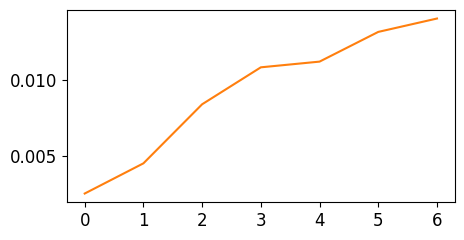

In [11]:
# plot var_dict
import matplotlib.pyplot as plt
n_scale = 8
fig, ax = plt.subplots(figsize=(5, 2.5))
k_dict = {}

for nmf_cluster, var_list in var_dict.items():
    # 如果nmf_cluster字符串中包含"Tumor Cells"，则不绘制
    if "Tumor Cells" in nmf_cluster or "Epithelial" in nmf_cluster or "Epithelium" in nmf_cluster:
        continue
    ax.plot(var_list[1:n_scale], label=nmf_cluster, color=color_mapping[nmf_cluster])
    # 线性拟合斜率
    k = np.polyfit([float(x.split('scale')[-1]) for x in umap_keys][:n_scale], var_list[:n_scale], 1)[0]
    k_dict[nmf_cluster] = k
# legend定位到外部
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(range(n_scale-1), [x.split('scale')[-1] for x in umap_keys][:n_scale-1])
plt.tight_layout()
plt.savefig(save_path + "/var_plot.pdf")
plt.show()

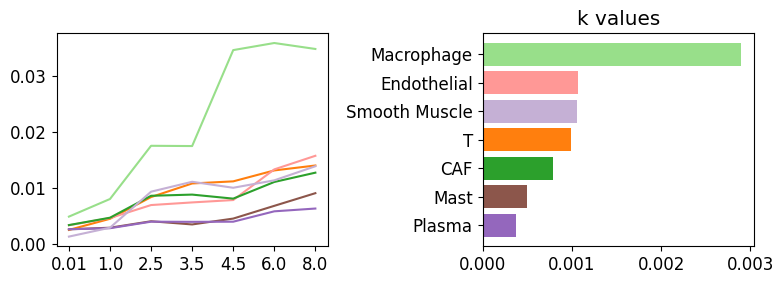

In [ ]:
k_dict = dict(sorted(k_dict.items(), key=lambda x: x[1], reverse=False))
# 删去key中含有"Tumor Cells"，"Epithelial"，"Epithelium"的元素
var_dict_noepi = {k: v for k, v in var_dict.items() if "Tumor Cells" not in k 
                and "Epithelial" not in k 
                and "Epithelium" not in k
                and "AT2_CYP2B6" not in k 
                and "AT2_SFTA2" not in k 
                and "Ciliated" not in k}
k_dict_noepi = {k: v for k, v in k_dict.items() if "Tumor Cells" not in k 
                and "Epithelial" not in k 
                and "Epithelium" not in k
                and "AT2_CYP2B6" not in k 
                and "AT2_SFTA2" not in k 
                and "Ciliated" not in k}

# 按 k 值从高到低排序
clusters = list(k_dict_noepi.keys())
values = list(k_dict_noepi.values())

# 创建画布
fig, axs = plt.subplots(1, 2, figsize=(8, 3))  # 调整画布大小以适应布局

# 绘制主图
for nmf_cluster, var_list in var_dict_noepi.items():
    axs[0].plot(var_list[1:n_scale], label=nmf_cluster, color=color_mapping[nmf_cluster])
# 移除图例和数值
axs[0].set_xticks(range(n_scale - 1))
axs[0].set_xticklabels([x.split('scale')[-1] for x in umap_keys][:n_scale - 1])  # x轴标签

# 在右侧绘制柱状图
right_ax = axs[1]
right_ax.barh(clusters, values, color=[color_mapping[cluster] for cluster in clusters])

# 美化柱状图
right_ax.set_yticks(range(len(clusters)))
right_ax.set_yticklabels(clusters)
# right_ax.set_xticks([])  # 隐藏 x 轴刻度
right_ax.set_title("k values")


plt.tight_layout()
plt.savefig(save_path + "/var_plot_withk.pdf")
plt.show()

## Macrophage

In [ ]:
ad_selected = ad[ad.obs['leiden_Raw_res1'] == selected_cluster]
ad_selected.obsm['X_umap'] = ad_selected.obsm['X_umap_scale' + str(scale)]

In [ ]:
var_list_selected = var_dict_noepi[selected_cluster]
# 寻找肘点Cells
from kneed import KneeLocator
kl = KneeLocator(range(1, n_scale), var_list_selected[1:n_scale], curve='concave', direction='increasing', online=True)
umap_keys[kl.elbow-1]

'X_umap_scale4.5'

In [ ]:
from clustering_science.CFSFDP import CFSFDP
from sklearn.cluster import KMeans

def calculate_centroids(X, labels):
    unique_labels = np.unique(labels)
    centroids = np.vstack([X[labels == label].mean(axis=0) for label in unique_labels])
    return centroids, unique_labels

def ward_linkage(X, y):
    centroids, unique_labels = calculate_centroids(X, y)
    n_clusters = len(unique_labels)
    
    # 计算每个簇的样本数量
    sizes = np.array([np.sum(y == label) for label in unique_labels])
    
    # 计算每个簇的ESS
    ess_per_cluster = np.array([np.sum((X[y == label] - centroids[i]) ** 2)
                                for i, label in enumerate(unique_labels)])
    
    # 计算各个簇合并后的ESS差值矩阵
    all_centroids_exp = centroids[:, np.newaxis, :] - centroids[np.newaxis, :, :]
    centroid_dists_sq = np.sum(all_centroids_exp ** 2, axis=-1)
    
    # 使用广播计算Ward距离，避免嵌套循环
    ess_diff = (sizes[:, np.newaxis] * sizes[np.newaxis, :]) / (sizes[:, np.newaxis] + sizes[np.newaxis, :]) * centroid_dists_sq
    
    # 确保只考虑上三角部分的有效合并差值
    mask = np.triu(np.ones_like(ess_diff, dtype=bool), k=1)
    
    ess_diff[~mask] = np.inf  # 忽略下三角和对角线（自合并没有意义）

    min_ward_value = np.min(ess_diff)
    return min_ward_value# / len(y)

# ward_list = dict()
# for key in umap_keys:
#     X = ad_selected.obsm['scaled'+key]
#     y = KMeans(n_clusters=2).fit_predict(X)
#     ward_list[key] = ward_linkage(X, y)
# ward_list


{'X_umap_scale0.01': 68.44062232762283,
 'X_umap_scale1.0': 123.38096249033342,
 'X_umap_scale2.5': 347.73838009559404,
 'X_umap_scale3.5': 333.08332953737784,
 'X_umap_scale4.5': 801.0128196880896,
 'X_umap_scale6.0': 759.6946445850242,
 'X_umap_scale8.0': 548.1004855915869,
 'X_umap_scale13.0': 454.10732008111665,
 'X_umap_scale25.0': 573.9547574811822,
 'X_umap_scale40.0': 582.8273674546435}

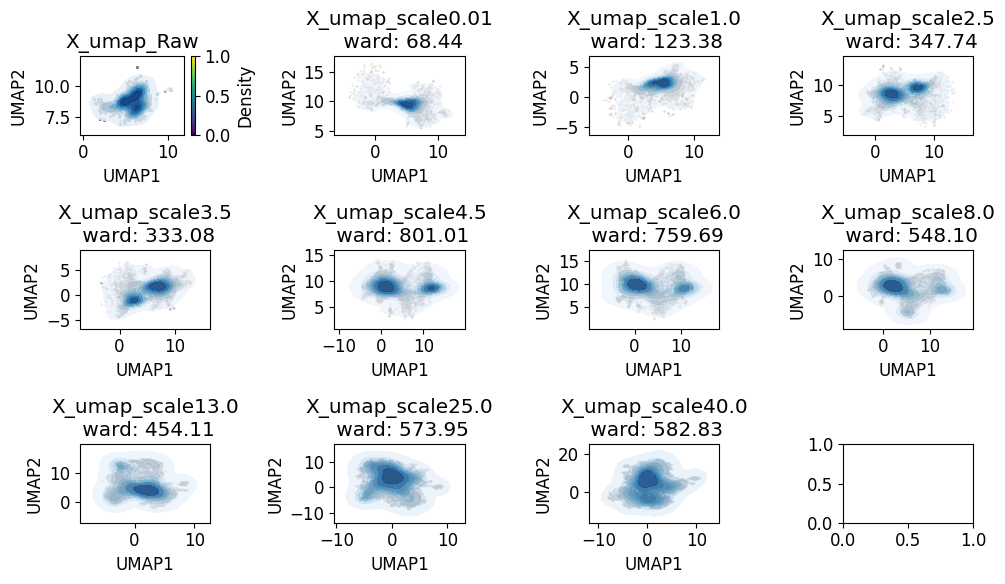

In [ ]:
import seaborn as sns
# 选择startwith 'X_umap_scale'的key
obsm_key = list(ad.obsm.keys())
umap_keys = [key for key in obsm_key if key.startswith('X_umap_scale')]
# 按'_'分割后最后一个元素的数字大小排序，从小到大
umap_keys = sorted(umap_keys, key=lambda x: float(x.split('scale')[-1]))

# 创建子图
fig, axes = plt.subplots(3, int((len(umap_keys)+2)/3), figsize=(len(umap_keys), 6))

# raw
X = ad_selected.obsm['X_umap_Raw']
ax = axes.flatten()[0]

# KDE plot
ax.scatter(X[:, 0], X[:, 1], color='gray', s=0.5)
for collection in ax.collections:
    collection.set_rasterized(True)  # 将散点设置为栅格化

umap_df = pd.DataFrame(X, columns=['UMAP1', 'UMAP2'])
kde = sns.kdeplot(data=umap_df, x='UMAP1', y='UMAP2', ax=ax, bw_adjust=2,
            cmap='Blues', fill=True, thresh=0.01, levels=8, alpha=0.8)

contour = kde.collections[0]
cbar = plt.colorbar(contour)
cbar.set_label('Density')

ax.set_title('X_umap_Raw')



# 遍历umap_keys
for key in umap_keys:
    X = ad_selected.obsm[key]
    ax = axes.flatten()[umap_keys.index(key)+1]
    ax.scatter(X[:, 0], X[:, 1], color='gray', s=0.05, alpha=0.5)
    for collection in ax.collections:
        collection.set_rasterized(True)  # 将散点设置为栅格化

    # KDE plot
    umap_df = pd.DataFrame(X, columns=['UMAP1', 'UMAP2'])
    sns.kdeplot(data=umap_df, x='UMAP1', y='UMAP2', ax=ax, bw_adjust=2,
                cmap='Blues', fill=True, thresh=0.01, levels=8, alpha=0.7)
    # ax.set_title(key+'\n ward: %.2f' % ward_list[key])
    ax.set_title(key)

plt.tight_layout()
plt.savefig(save_path + "/umaps_kde_scale_new" + str(scale) + ".pdf")
plt.show()

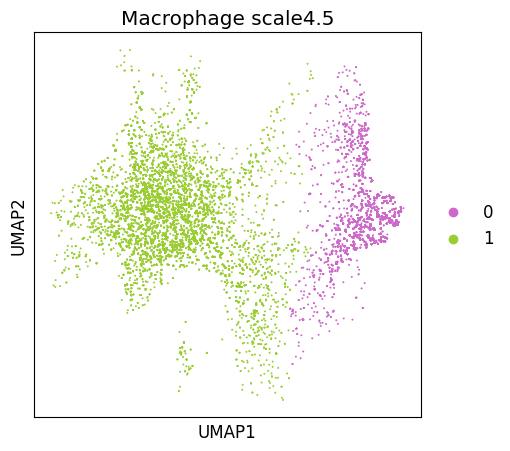

In [ ]:
# test clustering methods
from clustering_science.CFSFDP import CFSFDP
# clustering_model = CFSFDP(n_clusters=n_component)
clustering_model = CFSFDP()
res = clustering_model.fit_predict(ad_selected.obsm['X_umap'])
ad_selected.obs['cluster_label_cfsfdp'] = list(res.astype(str))
ad_selected.obs['cluster_label'] = list(res.astype(str))

ad_selected_plot = ad_selected[ad_selected.obs['cluster_label'] != '-1']
ad_selected_plot.uns['cluster_label_colors'] = [colors_2[1], colors_2[0]]
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.umap(ad_selected_plot, color=['cluster_label'], title=selected_cluster + ' scale' + str(scale), 
           show=False, ax=ax)
plt.savefig(save_path + "/umap_cluster_cfsfdp_scale" + str(scale) + ".pdf")
plt.show()

In [ ]:
ward_list_fixedy = dict()
for key in umap_keys:
    X = ad_selected_plot.obsm['scaled'+key]
    y = ad_selected_plot.obs['cluster_label']
    ward_list_fixedy[key] = ward_linkage(X, y)
ward_list_fixedy

{'X_umap_scale0.01': 39.401107704559074,
 'X_umap_scale1.0': 78.58789879242487,
 'X_umap_scale2.5': 259.8552947316836,
 'X_umap_scale3.5': 254.42381588443465,
 'X_umap_scale4.5': 788.912171350335,
 'X_umap_scale6.0': 720.9568443729103,
 'X_umap_scale8.0': 427.0196665059858,
 'X_umap_scale13.0': 211.77161661178192,
 'X_umap_scale25.0': 94.1194871140114,
 'X_umap_scale40.0': 23.398548268808515}

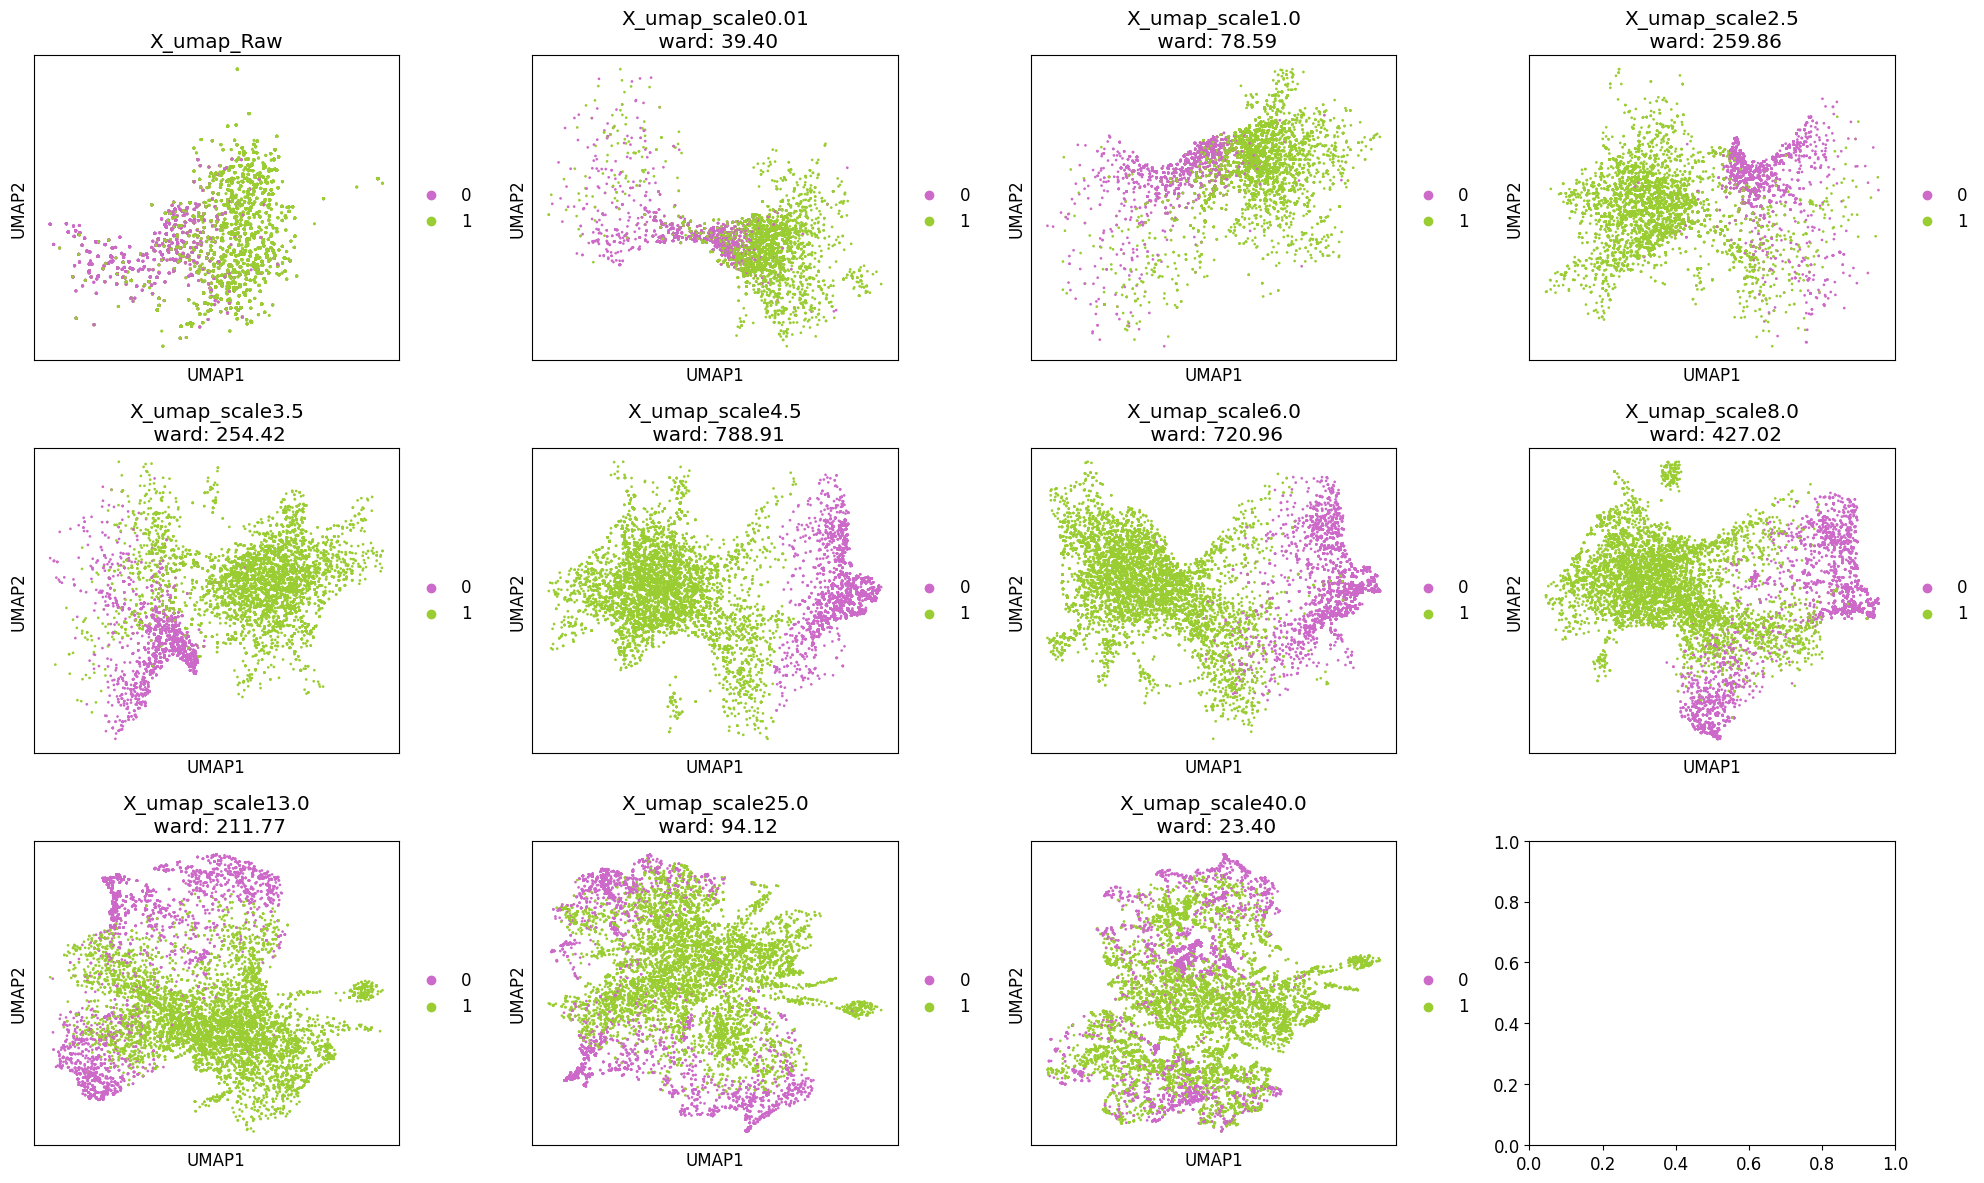

In [ ]:
# 选择startwith 'X_umap_scale'的key
obsm_key = list(ad.obsm.keys())
umap_keys = [key for key in obsm_key if key.startswith('X_umap_scale')]
# 按'_'分割后最后一个元素的数字大小排序，从小到大
umap_keys = sorted(umap_keys, key=lambda x: float(x.split('scale')[-1]))

# ad_selected_plot = ad_selected.copy()
# 创建子图
fig, axes = plt.subplots(3, int((len(umap_keys)+2)/3), figsize=(len(umap_keys)*2, 12))

# raw
ad_selected_plot.obsm['X_umap'] = ad_selected_plot.obsm['X_umap_Raw']
ax = axes.flatten()[0]
sc.pl.umap(ad_selected_plot, 
            size=20,
            color=['cluster_label'], title='X_umap_Raw', 
            ax=ax, 
            show=False)
for collection in ax.collections:
    collection.set_rasterized(True)  # 将散点设置为栅格化

# 遍历umap_keys
for key in umap_keys:
    ad_selected_plot.obsm['X_umap'] = ad_selected_plot.obsm[key]
    ax = axes.flatten()[umap_keys.index(key) + 1]
    sc.pl.umap(ad_selected_plot, 
               size=15,
               color=['cluster_label'], title=key, 
               ax=ax, 
               show=False)
    for collection in ax.collections:
        collection.set_rasterized(True)  # 将散点设置为栅格化
    # 添加文本
    ax.set_title(key + '\n ward: %.2f' % ward_list_fixedy[key])
    
    

plt.tight_layout()
plt.savefig(save_path + "/umaps_cluster_scale" + str(scale) + ".pdf")
plt.show()

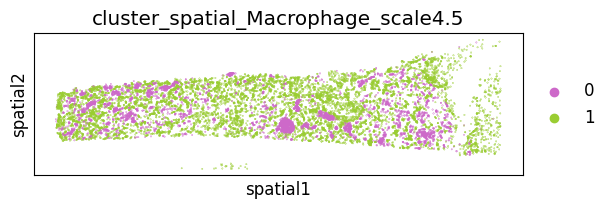

In [ ]:
import squidpy as sq
# cluster_label转成category
ad_selected_plot.obs['cluster_label_cfsfdp'] = ad_selected_plot.obs['cluster_label_cfsfdp'].astype('category')

sq.pl.spatial_scatter(
    ad_selected_plot, library_id="spatial", shape=None, 
    size=0.1,
    color= ['cluster_label'],
    figsize=(6, 4),
    # rasterized=True,
    title='cluster_spatial_' + selected_cluster + '_scale' + str(scale),
    save=save_path + "/cluster_spatial_" + selected_cluster + "_scale" + str(scale) + ".pdf"
)

In [ ]:
from clustering_science.CFSFDP import CFSFDP
from scipy.stats import norm

# 统计验证，相较于原始数据，新数据应当分为两群
def calculate_centroids(X, labels):
    unique_labels = np.unique(labels)
    centroids = np.vstack([X[labels == label].mean(axis=0) for label in unique_labels])
    return centroids, unique_labels

def ward_linkage(X, y):
    centroids, unique_labels = calculate_centroids(X, y)
    n_clusters = len(unique_labels)
    
    # 计算每个簇的样本数量
    sizes = np.array([np.sum(y == label) for label in unique_labels])
    
    # 计算每个簇的ESS
    ess_per_cluster = np.array([np.sum((X[y == label] - centroids[i]) ** 2)
                                for i, label in enumerate(unique_labels)])
    
    # 计算各个簇合并后的ESS差值矩阵
    all_centroids_exp = centroids[:, np.newaxis, :] - centroids[np.newaxis, :, :]
    centroid_dists_sq = np.sum(all_centroids_exp ** 2, axis=-1)
    
    # 使用广播计算Ward距离，避免嵌套循环
    ess_diff = (sizes[:, np.newaxis] * sizes[np.newaxis, :]) / (sizes[:, np.newaxis] + sizes[np.newaxis, :]) * centroid_dists_sq
    
    # 确保只考虑上三角部分的有效合并差值
    mask = np.triu(np.ones_like(ess_diff, dtype=bool), k=1)
    
    ess_diff[~mask] = np.inf  # 忽略下三角和对角线（自合并没有意义）

    min_ward_value = np.min(ess_diff)
    return min_ward_value / len(y)


w_list = []
for i in range(50):
    if ad_selected_plot.n_obs < 500:
        subset = sc.pp.subsample(ad_selected_plot, fraction=0.5, copy=True, random_state=i)
    else:
        subset = sc.pp.subsample(ad_selected_plot, n_obs=200, copy=True, random_state=i)
    X = subset.obsm['scaled_X_umap_Raw']
    y = CFSFDP(n_clusters=2).fit_predict(X)
    X = X[y != -1, :]
    y = y[y != -1]
    w_list.append(ward_linkage(X, y))
w_mean = np.mean(w_list)
w_std = np.std(w_list)

X = ad_selected_plot.obsm['scaled'+umap_scale]
y = CFSFDP(n_clusters=2).fit_predict(X)
X = X[y != -1, :]
y = y[y != -1]
ward_linkage_value = ward_linkage(X, y)

p_value = 1 - norm.cdf(ward_linkage_value, w_mean, w_std)
print(p_value)

0.0


### Gene expression

In [ ]:
sc.tl.rank_genes_groups(ad_selected_plot, 'cluster_label', method='wilcoxon')

# ad_selected差异分析结果表格
result = ad_selected_plot.uns['rank_genes_groups']
# dataframe格式展示result
# groups = result['names'].dtype.names
result_df_c0 = pd.DataFrame({key: result[key]['0'] for key in ['names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges']})
result_df_c1 = pd.DataFrame({key: result[key]['1'] for key in ['names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges']})

### 滤去环境细胞marker，做差异分析
# 按细胞类型做差异分析找到典型markers
sc.tl.rank_genes_groups(ad, 'leiden_Raw_res1', method='wilcoxon')
result = ad.uns['rank_genes_groups']
# groups = result['names'].dtype.names  # cluster list

# result to dataframe
result_df = pd.DataFrame({key: result[key][selected_cluster] for key in ['names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges']})
# sort by result_df_c0 row names
result_df.index = result_df['names']
lfc_seleccted_cluster = result_df.loc[list(result_df_c0['names'])]['logfoldchanges']
result_df_c0['logfoldchanges_celltype'] = list(lfc_seleccted_cluster)
lfc_seleccted_cluster = result_df.loc[list(result_df_c1['names'])]['logfoldchanges']
result_df_c1['logfoldchanges_celltype'] = list(lfc_seleccted_cluster)

result_df_c0_celltype = result_df_c0[result_df_c0['logfoldchanges_celltype'] > 0]
result_df_c1_celltype = result_df_c1[result_df_c1['logfoldchanges_celltype'] > 0]

result_df_c0_celltype.to_csv(save_path + f"/diff_analysis_cluster0.csv")
result_df_c1_celltype.to_csv(save_path + f"/diff_analysis_cluster1.csv")

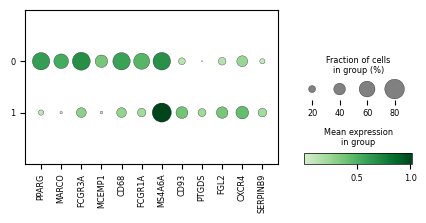

In [ ]:
import scanpy as sc
from matplotlib.colors import ListedColormap
green_cmap = ListedColormap(plt.cm.Greens(np.linspace(0.2, 1, 256)))
plt.rcParams.update({'font.size': 7})

# Define the list of genes
# # rank result_df_c0_celltype and result_df_c1_celltype by logfoldchanges
# result_df_c0_celltype = result_df_c0_celltype.sort_values(by='logfoldchanges', ascending=False)
# result_df_c1_celltype = result_df_c1_celltype.sort_values(by='logfoldchanges', ascending=False)
genes = list(result_df_c0_celltype.iloc[:6,0]) + list(result_df_c1_celltype.iloc[:6,0])


# Generate the stacked violin plot
fig = sc.pl.dotplot(
    ad_selected_plot,
    var_names=genes,
    groupby='cluster_label',
    #inner='box',  # Add box plots within the violins
    figsize=(5, 2),  # Larger size for better visibility
    layer=None,
    swap_axes=False,  # Stacks violins horizontally
    cmap=green_cmap,  # Apply the green color map
    show=False,  # Delay showing to customize further
    standard_scale=None,  # Scale the violins by width
)

# Adjust legend and other aesthetics
# Adjust plot aesthetics
ax = plt.gca()

# Set all axis spines (borders) to 0.5pt
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

# plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))  # Move legend to the right
plt.tight_layout()  # Adjust layout to avoid overlap

plt.savefig(save_path + "/dotplot_degenes.pdf", dpi=300)
# Show the plot
plt.show()


In [ ]:
# save cell types and macro subclusters for xenium explorer
celltype_labels = ad.obs['leiden_Raw_res1']
ad.obs['celltype_macsub'] = [celltype_labels[i] if i not in ad_selected.obs_names else (celltype_labels[i] + '_cluster' + ad_selected.obs['cluster_label'][i]) for i in celltype_labels.index]
print(np.unique(ad.obs['celltype_macsub']))
pd.DataFrame({'cell_id': ad.obs['cell_id'], 'group': ad.obs['celltype_macsub']}).to_csv(save_path + "/cell_groups.csv", index=False)

celltype_list = list(ad.obs['celltype_macsub'])
celltype_list = ['Epithelial' if label in ['AT2_CYP2B6', 'AT2_SFTA2', 'Basal Epithelial', 'Ciliated', 'Secretory Epithelial'] 
                 else label for label in celltype_list]
celltype_list = ['Mesenchymal' if label in ['CAF', 'Smooth Muscle'] 
                 else label for label in celltype_list]
celltype_list = ['Other Immune' if label in ['Mast', 'Plasma', 'T'] 
                 else label for label in celltype_list]
ad.obs['lineage_macsub'] = celltype_list
print(np.unique(ad.obs['lineage_macsub']))
pd.DataFrame({'cell_id': ad.obs['cell_id'], 'group': ad.obs['lineage_macsub']}).to_csv(save_path + "/cell_groups_lineage.csv", index=False)


['AT2_CYP2B6' 'AT2_SFTA2' 'Basal Epithelial' 'CAF' 'Ciliated'
 'Endothelial' 'Macrophage_cluster-1' 'Macrophage_cluster0'
 'Macrophage_cluster1' 'Mast' 'Plasma' 'Secretory Epithelial'
 'Smooth Muscle' 'T']
['Endothelial' 'Epithelial' 'Immune' 'Macrophage_cluster-1'
 'Macrophage_cluster0' 'Macrophage_cluster1' 'Mesenchymal']


In [ ]:
ad_sc = sc.read_h5ad("C:/Projects/spatialzoomer/data/lung_atlas.h5ad")
ad_sc

AnnData object with n_obs × n_vars = 347970 × 30536
    obs: 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_type', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'source_dataset', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'S.Score', 'G2M.Score', 'Phase', 'pMT', 'lineage_level1', 'lineage_level2', 'celltype_level1', 'celltype_level2', 'celltype_level3', 'celltype_level3_fullname', 'putative_CL_label', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'origSymbol', 'origOrder', 'keepRec', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: '

In [ ]:
ad_sc_macrophage = ad_sc[(ad_sc.obs['celltype_level1'] == "AM") | (ad_sc.obs['celltype_level1'] == "IM")]
ad_sc_macrophage

View of AnnData object with n_obs × n_vars = 107817 × 30536
    obs: 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_type', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'source_dataset', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'S.Score', 'G2M.Score', 'Phase', 'pMT', 'lineage_level1', 'lineage_level2', 'celltype_level1', 'celltype_level2', 'celltype_level3', 'celltype_level3_fullname', 'putative_CL_label', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'origSymbol', 'origOrder', 'keepRec', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
   

In [ ]:
result_df_c0_celltype = pd.read_csv(save_path + f"/diff_analysis_cluster0.csv", index_col=0)
result_df_c1_celltype = pd.read_csv(save_path + f"/diff_analysis_cluster1.csv", index_col=0)
deg_c0 = result_df_c0_celltype[(result_df_c0_celltype['logfoldchanges'] > 0.5) & (result_df_c0_celltype['pvals_adj'] < 0.05)]['names']
deg_c1 = result_df_c1_celltype[(result_df_c1_celltype['logfoldchanges'] > 0.5) & (result_df_c1_celltype['pvals_adj'] < 0.05)]['names']
print(len(deg_c0), len(deg_c1))

24 24


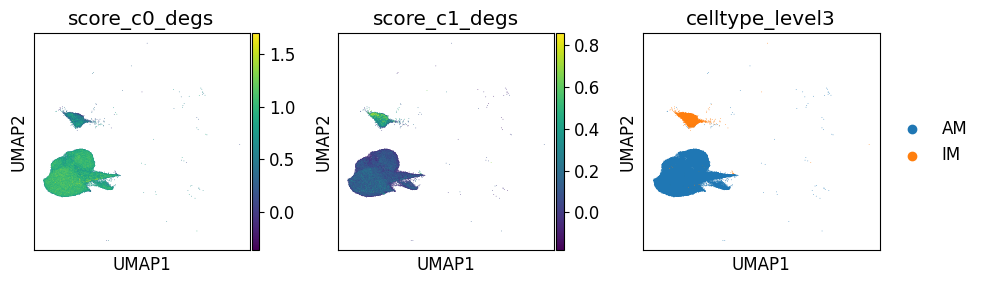

In [ ]:
# # set ad_sc_macrophage.var['feature_name'] as var_names
# ad_sc_macrophage.var_names = ad_sc_macrophage.var['feature_name'] c 

# sc.tl.score_genes(ad_sc_macrophage, list(deg_c0), score_name='score_c0_degs', use_raw=False)
# sc.tl.score_genes(ad_sc_macrophage, list(deg_c1), score_name='score_c1_degs', use_raw=False)

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sc.pl.umap(ad_sc_macrophage, color=['score_c0_degs'], ax=ax[0], show=False)
sc.pl.umap(ad_sc_macrophage, color=['score_c1_degs'], ax=ax[1], show=False)
sc.pl.umap(ad_sc_macrophage, color=['celltype_level3'], ax=ax[2], show=False)
for i in range(3):
    for collection in ax[i].collections:
        collection.set_rasterized(True)
plt.tight_layout()
plt.savefig(save_path + "/singlecell_scores.pdf")
plt.show()

### neighborhood cell types

Maximum distance:  219.58539005110458
Minimum distance:  1.4671651527726024
Median distance:  12.85500018425865
Maximum similarities:  68.1586526262618
Minimum similarities:  0.4554037041202115
Median similarities:  7.779074178596867


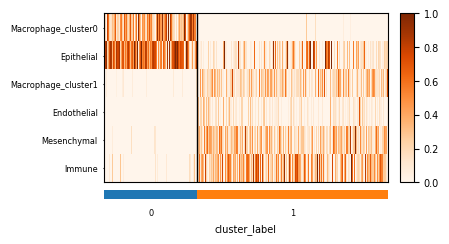

In [ ]:
def getKNN(adata, k = 10):
    from sklearn.neighbors import NearestNeighbors
    from scipy.sparse import csr_matrix
    import numpy as np
    
    coords = adata.obsm['spatial'].copy()
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='auto', metric='euclidean').fit(coords)
    distances, indices = nbrs.kneighbors(coords)
    
    distances = distances[:, 1:]
    indices = indices[:, 1:]
    print('Maximum distance: ', np.max(distances))
    print('Minimum distance: ', np.min(distances))
    print('Median distance: ', np.median(distances))

    # 策略1
    epsilon = 1e-10  
    similarities  = 100 / (distances + epsilon)
    
    # 策略2
    # max_distance = distances.max()
    # similarities = (max_distance - distances) / max_distance
    # 策略3
    # sigma = np.median(distances) / np.sqrt(2 * np.log(2))
    # similarities = np.exp(-distances**2 / (2 * sigma**2))

    print('Maximum similarities: ', np.max(similarities))
    print('Minimum similarities: ', np.min(similarities))
    print('Median similarities: ', np.median(similarities))

    n_cells = coords.shape[0]
    row_indices = np.repeat(np.arange(coords.shape[0]), k)
    col_indices = indices.flatten()
    data = similarities.flatten()
    
    knn_similarity_matrix = csr_matrix((data, (row_indices, col_indices)), shape=(n_cells, n_cells))
    knn_similarity_matrix = knn_similarity_matrix.maximum(knn_similarity_matrix.T)
    
    return knn_similarity_matrix

# # 时间优化后：
def calculate_neighbor_composition(knn_matrix, clusters, num_clusters):
    """
    计算每个细胞的邻居中属于每个聚类类别的占比，基于矩阵运算。
    
    :param knn_matrix: KNN 邻接矩阵 (稀疏矩阵)
    :param clusters: 细胞的聚类标签数组
    :param num_clusters: 聚类类别的数量
    :return: 每个细胞的邻居组成比例 (num_cells, num_clusters)
    """
    num_cells = knn_matrix.shape[0]
    
    # 构造 (num_cells, num_clusters) 的标签矩阵
    label_matrix = np.zeros((num_cells, num_clusters))
    label_matrix[np.arange(num_cells), clusters] = 1

    # 计算邻居标签的数量，knn_matrix 是 (num_cells, num_cells)
    # 使用稀疏矩阵乘法统计每个细胞的邻居中每种聚类标签的数量
    neighbor_labels_count = knn_matrix.dot(label_matrix)
    
    # 归一化，计算比例
    row_sums = neighbor_labels_count.sum(axis=1)  # 每个细胞邻居的总数
    row_sums[row_sums == 0] = 1  # 防止除以0的情况
    neighbor_labels_proportion = neighbor_labels_count / row_sums[:, np.newaxis]
    return neighbor_labels_proportion

# celltype_labels = ['AT2' if label in ['AT2_CYP2B6', 'AT2_SFTA2'] else label for label in ad.obs['leiden_Raw_res1']]

ad_plot = ad[ad.obs['lineage_macsub'] != 'Macrophage_cluster-1']
celltype_labels = ad_plot.obs['lineage_macsub']
n_cluster = len(np.unique(celltype_labels))
knn_similarity_matrix = getKNN(ad_plot, k=10)
# 建立标签到序号的映射
cluster_labels = np.unique(celltype_labels)
cluster_label_to_index = {label: i for i, label in enumerate(cluster_labels)}
# 将标签转换为序号
clusters = np.array([cluster_label_to_index[label] for label in celltype_labels])
# 计算邻居组成比例
component_matrix = calculate_neighbor_composition(
    knn_similarity_matrix, 
    clusters=clusters, 
    num_clusters=n_cluster)

env_component_ad = sc.AnnData(X=component_matrix, obs=ad_plot.obs)
env_component_ad.obs_names = ad_plot.obs_names
new_cluster_names = cluster_labels
env_component_ad.var_names = new_cluster_names

env_component_ad_selected = env_component_ad[ad_selected_plot.obs_names]
env_component_ad_selected.obs = ad_selected_plot.obs.copy()

# 对ad_selected两个cluster_label分组绘制component_matrix heatmap
# celltypes_ordered = ['Macrophage', 'AT2', 'Basal Epithelial', 'Secretory Epithelial', 'Ciliated', 
#                      'Smooth Muscle', 'Mast', 'Plasma', 'Endothelial', 'CAF', 'T']
sc.pl.heatmap(env_component_ad_selected, 
              groupby='cluster_label', 
              # var_names=env_component_ad_selected.var_names, 
              # var_names=celltypes_ordered,
              var_names= ['Macrophage_cluster0', 'Epithelial', 'Macrophage_cluster1', 'Endothelial', 'Mesenchymal', 'Immune'],
            #   cmap='RdYlBu_r',
              cmap='Oranges',
              figsize=(4, 2.5),
              swap_axes=True,
              save=f"_{dataset}_{selected_cluster}_component_matrix_heatmap.pdf")

In [5]:
ad.obs_names

Index(['1', '2', '3', '4', '5', '6', '8', '9', '10', '11',
       ...
       '162236', '162238', '162240', '162242', '162243', '162244', '162245',
       '162246', '162247', '162248'],
      dtype='object', length=149195)

In [4]:
morphology_path = "E:/SZ/Results/morphology/" + dataset + "_morphology_information.csv"
# check if the file exists
if os.path.exists(morphology_path):
    morphology = pd.read_csv(morphology_path, index_col=0)
morphology

,Cell_Type,nucleus_count,nucleus_area,cell_area,Cell_Perimeter,Cell_Area,Cell_Solidity,Cell_Convexity,Relative_Cell_Area,Relative_Cell_Perimeter,...,Nucleus_Convexity,Relative_Nucleus_Area,Relative_Nucleus_Perimeter,Nucleus_Circularity,Nucleus_Length,Nucleus_Width,Nucleus_Aspect_Ratio,Nucleus_Eccentricity,Nucleus_Cell_Area_Ratio,Centroid_Distance
1,T,1.0,21.268595,49.130002,24.901425,47.436672,0.996677,0.996885,1.313326,1.038108,...,0.977610,1.136913,1.023016,0.882467,5.709961,4.357547,1.310361,0.646223,0.415997,0.169646
2,AT2_2,1.0,74.778753,119.618911,43.339611,115.961463,0.955004,0.992206,1.448712,1.179649,...,0.997734,1.802322,1.283459,0.876558,12.467062,7.274626,1.713774,0.812108,0.624027,1.298658
3,AT2_1,1.0,59.109533,94.241097,36.193885,90.922142,0.981238,0.990743,1.100949,0.963363,...,0.992993,1.269662,1.072460,0.862313,10.883003,6.557814,1.659547,0.798063,0.623797,0.831361
4,AT2_2,1.0,52.426408,120.341411,42.595921,116.932837,0.939931,0.975043,1.460848,1.159407,...,0.979840,1.243917,1.108947,0.810367,8.758499,7.744428,1.130942,0.467073,0.427110,1.748282
5,AT2_2,2.0,56.084065,197.965007,62.494334,192.207838,0.854293,0.977220,2.401262,1.701016,...,0.972024,2.251657,2.216698,0.367114,9.838840,6.592552,1.492418,0.742313,0.470344,4.829027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162244,Mast,1.0,6.818594,6.818594,9.532312,5.938270,0.949465,0.962866,0.136654,0.362468,...,0.962866,0.304630,0.557376,0.821246,3.359920,2.352098,1.428478,0.714098,1.000000,0.000000
162245,T,1.0,13.140469,13.140469,14.481715,11.966419,0.972467,0.977988,0.331301,0.603724,...,0.977988,0.689425,0.883781,0.717025,5.987323,2.850987,2.100088,0.879353,1.000000,0.000000
162246,Macrophage M2_1,1.0,8.940938,34.634845,20.973973,32.670778,0.977712,0.988214,0.701077,0.744595,...,0.975698,0.443903,0.629322,0.880728,3.399902,2.975098,1.142787,0.484026,0.242578,0.007050
162247,B,1.0,5.644531,33.731720,20.848707,31.812054,0.979152,0.986466,0.985987,0.918113,...,0.972297,0.274625,0.533595,0.787990,3.305802,1.953488,1.692256,0.806725,0.151178,0.014887


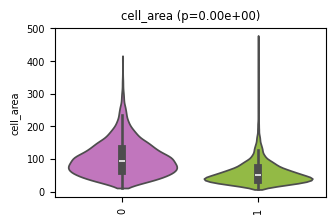

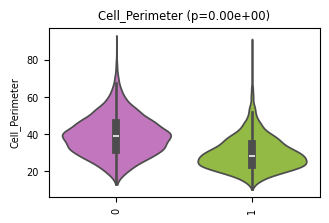

In [ ]:
from matplotlib import rc_context
from scipy import stats

def calculate_p_value(group1, group2):
    """
    计算两组数据之间的 p 值
    :param group1: 第一组数据，类型为列表或 numpy 数组
    :param group2: 第二组数据，类型为列表或 numpy 数组
    :return: p 值
    """
    # 进行独立样本 t 检验
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # equal_var=False 会进行Welch's t-test
    return p_value

morphology_path = "E:/SZ/Results/morphology/" + dataset + "_morphology_information.csv"
# check if the file exists
if os.path.exists(morphology_path):
    morphology = pd.read_csv(morphology_path, index_col=0)
    ad_selected_morphology = ad_selected.copy()
    ad_selected_morphology.obs = morphology.loc[ad_selected.obs_names.astype(int)]
    ad_selected_morphology.obs['cluster_label'] = list(ad_selected.obs['cluster_label_cfsfdp'])
ad_selected_morphology = ad_selected_morphology[ad_selected_morphology.obs['cluster_label'] != '-1']

# 指定指标
keys = ['cell_area', 'Cell_Perimeter']

# 设置颜色为 "#86C9E8", "#EBA7A6"
ad_selected_morphology.uns['cluster_label_colors'] = [colors_2[1], colors_2[0]]

# 循环绘制并保存每个指标的小提琴图
for key in keys:
    group1 = ad_selected_morphology[ad_selected_morphology.obs['cluster_label'] == '0', :].obs[key]
    group2 = ad_selected_morphology[ad_selected_morphology.obs['cluster_label'] == '1', :].obs[key]
    p_value = calculate_p_value(group1, group2)
    # print(f"p-value for {key}: {p_value:.3f}")
    # with rc_context({"figure.figsize": (3.5, 2.2), "axes.labelsize": 20}):
    fig, ax = plt.subplots(figsize=(3.5, 2.2))
    sc.pl.violin(
        ad_selected_morphology,
        keys=[key], # 单个指标
        groupby='cluster_label',   # 按 Batch2 分组
        rotation=90,    # 横轴标签旋转\
        stripplot=False,    # 不绘制散点
        inner="box",    # 在小提琴图内绘制箱线图
        ax=ax,
        show=False,    # 不立即显示图形
        # save=f"{key}_violin_plot.pdf",   # 保存为单独的 PDF 文件
        )
    ax.set_title(f"{key} (p={p_value:.2e})")
    plt.savefig(save_path + f"/{key}_violin_plot.pdf", bbox_inches='tight')
    plt.show()